In [1]:
!pip install textstat

     |████████████████████████████████| 102kB 3.9MB/s 
     |████████████████████████████████| 1.9MB 7.2MB/s 


In [2]:
import nltk
nltk.download('punkt')
import re
import textstat as ts
from nltk.tokenize import sent_tokenize
import pandas as pd
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
df = pd.read_csv('/content/drive/MyDrive/lo_list.csv')

In [7]:
df.head()

,lo_list
0,Explain machine learning and pattern recogniti...
1,"Define methods for solving classification, clu..."
2,"Solve practical classification, clustering, re..."
3,"Write coherently, concisely, and clearly in a ..."
4,"Explain the societal, legal, and ethical impli..."


In [8]:
dataset_list =  df['lo_list'].tolist()
unique_sentences = list(set(dataset_list))

In [10]:
len(unique_sentences)

82

In [11]:
import re

for i in range(len(unique_sentences)):
  unique_sentences[i] = re.sub('[^a-zA-Z]', ' ', unique_sentences[i])
unique_sentences[0]

'Relate game development methodologies to other application areas of Computer Science'

In [12]:
value_list = []
for s in unique_sentences:
    tempList =[]
    tempList.append(s)
    tempList.append(ts.char_count(s))
    tempList.append(ts.flesch_kincaid_grade(s))
    tempList.append(ts.coleman_liau_index(s))
    tempList.append(ts.automated_readability_index(s))
    tempList.append(ts.linsear_write_formula(s))
    tempList.append(ts.gunning_fog(s))
    tempList.append(ts.text_standard(s,float_output=True))
    value_list.append(tempList)

In [13]:
column_headers = ['Sentence','No of characters','Flesch_Kincaid_Grade','Coleman_Liau_Index','Automated_readability_index','Linsear_Write','Gunning_Fog','Aggr_score']

In [14]:
metrics_df = pd.DataFrame(value_list,columns=column_headers)
metrics_df.head()

,Sentence,No of characters,Flesch_Kincaid_Grade,Coleman_Liau_Index,Automated_readability_index,Linsear_Write,Gunning_Fog,Aggr_score
0,Relate game development methodologies to other...,74,15.8,20.57,15.8,8.5,18.95,16.0
1,Understand the foundations of the Bayesian app...,62,9.6,17.20,12.8,6.0,8.00,10.0
2,Locate review and employ relevant techniques...,52,15.9,18.05,13.2,5.0,13.20,14.0
3,Explain what is meant by an efficient algorithm,40,6.4,9.35,6.1,5.0,13.20,8.0
4,Explain the distinction between deductive ind...,79,22.5,27.06,20.8,11.0,28.00,28.0


In [19]:
des = metrics_df.describe()

In [24]:
import matplotlib
import matplotlib.pyplot as plt

labels = ['Flesch_Kincaid_Grade','Coleman_Liau_Index','Automated_readability_index','Linsear_Write','Gunning_Fog','Aggr_score']


In [21]:
des_list = des.values.tolist()

In [22]:
mean_list = des_list[1][1:7]

No handles with labels found to put in legend.


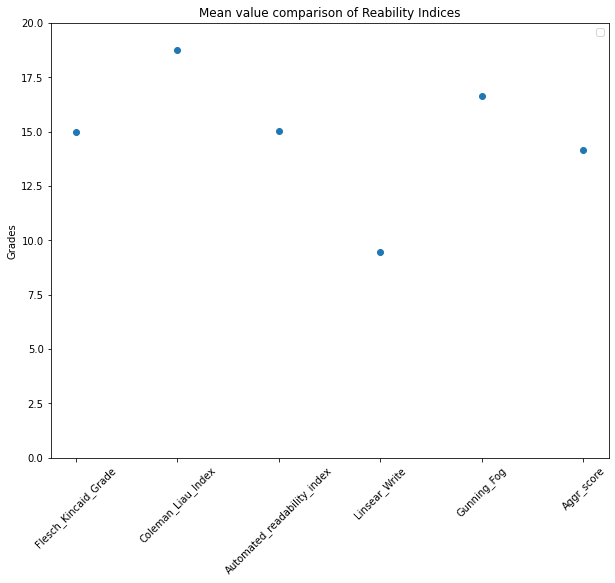

In [43]:
x = np.arange(len(labels))  # the label locations
plt.figure(figsize=(10,8))
plt.scatter(x,mean_list); plt.ylim(0,20)
# fig, ax = plt.subplots(figsize=(15,5))
# rects1 = ax.scatter(x, mean_list, label='DSCS')


# # Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Grades')
plt.title('Mean value comparison of Reability Indices')
plt.xticks(x,labels,rotation=45)
plt.legend()